In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('merged_dataset.csv', encoding='latin1')

In [ ]:
df.sample(5)

,productID,summary,overall_rating,Usefulness
56,B0DZHXTPK1,Cable is worth for buying RS 50 not more then ...,4.5,Useful
52,B0DLW44CGS,5G network speed is extraordinary. Superior bu...,4.0,Not Useful
45,B0DFMHM9CM,Boult K10 earbuds are really worth the price. ...,4.1,Not Useful
28,B0CHX2F5QT,The iPhone 15 has truly surpassed all my expec...,4.5,Useful
9,B07WHRZRD7,After using 6 days with 186 apps its performan...,4.3,Useful


In [ ]:
df.shape

(57, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productID       57 non-null     object 
 1   summary         57 non-null     object 
 2   overall_rating  57 non-null     float64
 3   Usefulness      57 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.9+ KB


In [ ]:
df.drop(columns=['overall_rating'],inplace=True)


In [ ]:
df.sample(5)

,productID,summary,Usefulness
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,Not Useful
5,B077BFH786,The dimensions are not correct. Its not 40cmx4...,Useful
34,B0D18192T2,The Logitech B170 wireless mouse is a reliable...,Useful
12,B082WYMTWF,The RTS HighSpeed Wall Charger and Universal T...,Not Useful
8,B07WHQHNZC,The camera quality is abysmal. Colors are abso...,Not Useful


In [ ]:
# renaming the cols
df.rename(columns={'Usefulness':'target','summary':'text'},inplace=True)
df.sample(5)


,productID,text,target
26,B0CBTTCJL6,The OnePlus Bullets Wireless Z2 are quite ligh...,Not Useful
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,Useful
50,B0DLW1L5PR,5G network speed is extraordinary. Superior bu...,Not Useful
54,B0DSG51QM1,Boult newly launched Z20 truly wireless blueto...,Useful
9,B07WHRZRD7,After using 6 days with 186 apps its performan...,Useful


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,productID,text,target
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0


In [ ]:
df.isnull().sum()


,0
productID,0
text,0
target,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates(keep='first')


In [ ]:

df.duplicated().sum()


np.int64(0)

In [ ]:
df.head()


,productID,text,target
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0


In [ ]:
df['target'].value_counts()


,count
target,
0,35
1,22


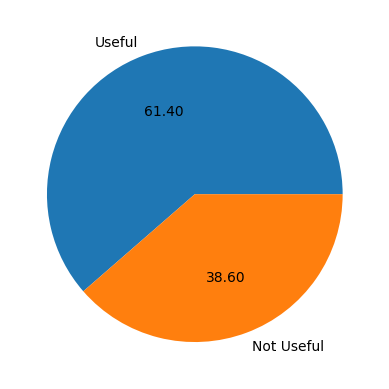

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Useful','Not Useful'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk


In [ ]:
!pip install nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)


In [ ]:
df.head()


,productID,text,target,num_characters
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1,286
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0,354
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0,267
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1,387
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0,306


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()


,productID,text,target,num_characters,num_words
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1,286,55
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0,354,71
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0,267,58
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1,387,71
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0,306,55


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()


,productID,text,target,num_characters,num_words,num_sentences
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1,286,55,5
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0,354,71,7
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0,267,58,6
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1,387,71,3
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0,306,55,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,57.000000,57.000000,57.000000
mean,327.263158,62.052632,4.192982
std,48.715107,9.309022,1.456986
min,253.000000,47.000000,3.000000
25%,293.000000,55.000000,3.000000
50%,309.000000,59.000000,4.000000
75%,358.000000,66.000000,5.000000
max,482.000000,87.000000,8.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,35.000000,35.000000,35.000000
mean,329.885714,62.885714,4.114286
std,50.861271,9.129047,1.510189
min,254.000000,47.000000,3.000000
25%,294.000000,57.500000,3.000000
50%,314.000000,60.000000,3.000000
75%,350.500000,67.000000,4.500000
max,482.000000,87.000000,7.000000


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string


In [ ]:
from nltk.stem.porter import PorterStemmer
# Create the PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df.head()


,productID,text,target,num_characters,num_words,num_sentences,transformed_text
0,B00LVMTA2A,For car key fob lasts 8 to 12 months. Packing ...,1,286,55,5,car key fob last 8 12 month pack deserv 5 star...
1,B00MVV81MK,Good quality price could be reduced a bit Noth...,0,354,71,7,good qualiti price could reduc bit noth say co...
2,B01DEWVZ2C,My wife uses it for audio editing and she conf...,0,267,58,6,wife use audio edit conform hear tini sound qu...
3,B01HJI0FS2,The Dell MS116 Wired Optical Mouse is a solid ...,1,387,71,3,dell ms116 wire optic mous solid choic anyon l...
4,B071Z8M4KX,The boAt BassHeads 100 headphones feature a sl...,0,306,55,3,boat basshead 100 headphon featur sleek ergono...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
Not_Useful_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


In [ ]:
Useful_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


In [ ]:

Not_Useful_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        Not_Useful_corpus.append(word)


In [ ]:
Useful_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        Useful_corpus.append(word)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape


(57, 683)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
X_train_strings = [' '.join(map(str, tokens)) for tokens in X_train]

In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train_strings, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


1.0
[[9 0]
 [0 3]]
1.0


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9166666666666666
[[9 0]
 [1 2]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9166666666666666
[[9 0]
 [1 2]]
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9166666666666666, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9166666666666666
Precision -  1.0
For  KN
Accuracy -  0.6666666666666666
Precision -  0.0
For  NB
Accuracy -  0.9166666666666666
Precision -  1.0
For  DT
Accuracy -  0.6666666666666666
Precision -  0.0
For  LR
Accuracy -  0.75
Precision -  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  RF
Accuracy -  0.9166666666666666
Precision -  1.0
For  AdaBoost
Accuracy -  0.8333333333333334
Precision -  0.6666666666666666
For  BgC
Accuracy -  0.8333333333333334
Precision -  0.6666666666666666
For  ETC
Accuracy -  0.9166666666666666
Precision -  1.0
For  GBDT
Accuracy -  0.8333333333333334
Precision -  0.6666666666666666
For  xgb
Accuracy -  1.0
Precision -  1.0


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.916667,1.000000
2,NB,0.916667,1.000000
5,RF,0.916667,1.000000
10,xgb,1.000000,1.000000
8,ETC,0.916667,1.000000
7,BgC,0.833333,0.666667
6,AdaBoost,0.833333,0.666667
9,GBDT,0.833333,0.666667
1,KN,0.666667,0.000000
3,DT,0.666667,0.000000


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.916667
1,NB,Accuracy,0.916667
2,RF,Accuracy,0.916667
3,xgb,Accuracy,1.000000
4,ETC,Accuracy,0.916667
5,BgC,Accuracy,0.833333
6,AdaBoost,Accuracy,0.833333
7,GBDT,Accuracy,0.833333
8,KN,Accuracy,0.666667
9,DT,Accuracy,0.666667


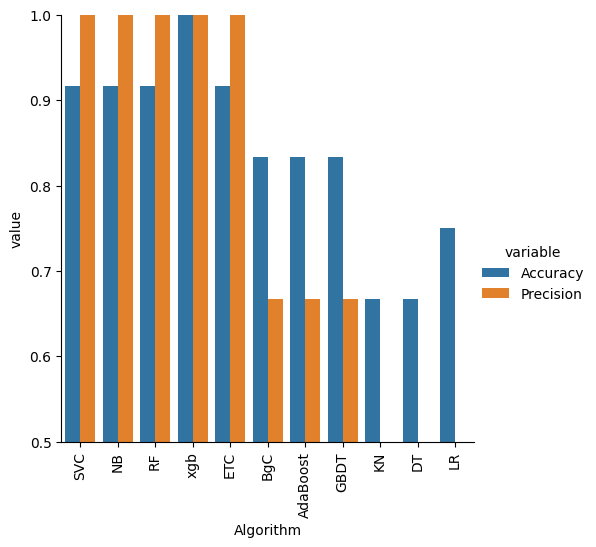

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
1,NB,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
2,RF,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
3,xgb,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,ETC,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
5,BgC,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667
6,AdaBoost,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667
7,GBDT,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667
8,KN,0.666667,0.000000,0.666667,0.000000,0.666667,0.000000,0.666667,0.000000
9,DT,0.666667,0.000000,0.666667,0.000000,0.666667,0.000000,0.666667,0.000000
